In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
WTIprice=pd.read_csv("Cushing_OK_Crude_Oil_Future_Contract_1.csv",skiprows=4,parse_dates=["Day"],index_col="Day")
WTIprice.columns=['Price']
WTIprice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9356 entries, 2020-07-07 to 1983-04-04
Data columns (total 1 columns):
Price    9356 non-null float64
dtypes: float64(1)
memory usage: 146.2 KB


In [3]:
WTIprice.loc["2020-01-03"]

,Price
Day,
2020-01-03,63.05


In [4]:
oneyear_WTIprice=WTIprice[:"2020-01-03"]
oneyear_WTIprice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2020-07-07 to 2020-01-03
Data columns (total 1 columns):
Price    128 non-null float64
dtypes: float64(1)
memory usage: 2.0 KB


In [5]:
oneyear_WTIprice.sort_index()

,Price
Day,
2020-01-03,63.05
2020-01-06,63.27
2020-01-07,62.70
2020-01-08,59.61
2020-01-09,59.56
...,...
2020-06-30,39.27
2020-07-01,39.82
2020-07-02,40.65


/Users/xinranlong/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


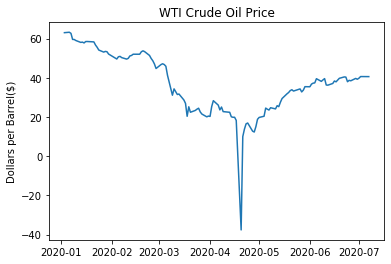

In [6]:
plt.plot(oneyear_WTIprice)
plt.title('WTI Crude Oil Price')
plt.ylabel('Dollars per Barrel($)');
plt.show()

##https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [7]:
#Brent Crude Price
BrentPrice=pd.read_csv("BrentPrice.csv",parse_dates=["Date"],index_col="Date")
BrentPrice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158 entries, 2020-01-03 to 2020-07-10
Data columns (total 6 columns):
Open         149 non-null float64
High         149 non-null float64
Low          149 non-null float64
Close        149 non-null float64
Adj Close    149 non-null float64
Volume       149 non-null float64
dtypes: float64(6)
memory usage: 8.6 KB


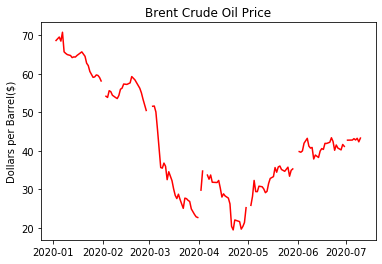

In [8]:
#Plot Brent Price Change
plt.plot(BrentPrice.index,BrentPrice['Adj Close'],'r')
plt.title('Brent Crude Oil Price')
plt.ylabel('Dollars per Barrel($)');
plt.show()

In [9]:
#Keep Brent only Adj Close
BrentPrice=pd.DataFrame(BrentPrice,columns=['Adj Close'])
BrentPrice.info()
BrentPrice.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 158 entries, 2020-01-03 to 2020-07-10
Data columns (total 1 columns):
Adj Close    149 non-null float64
dtypes: float64(1)
memory usage: 2.5 KB


,Adj Close
Date,
2020-01-03,68.660004
2020-01-05,69.559998
2020-01-06,68.500000
2020-01-07,70.800003
2020-01-08,65.709999


In [10]:
#Merge WTI and Brent
CrudeOil=BrentPrice.merge(oneyear_WTIprice,left_index=True,right_index=True)
CrudeOil.rename(columns={'Adj Close': 'Brent', 'Price': 'WTI'}, inplace=True)
CrudeOil.head()

,Brent,WTI
2020-01-03,68.660004,63.05
2020-01-06,68.500000,63.27
2020-01-07,70.800003,62.70
2020-01-08,65.709999,59.61
2020-01-09,65.309998,59.56


In [11]:
#drop WTI =-37, 2020-04-20
CrudeOil.loc["2020-04-20"]=[np.NaN,np.NaN]

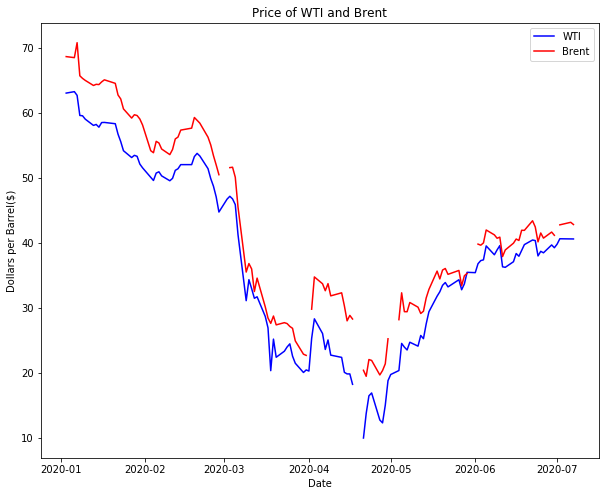

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(CrudeOil.index,CrudeOil['WTI'],'b-',label = 'WTI')
plt.plot(CrudeOil.index,CrudeOil['Brent'],'r-',label = 'Brent')
plt.xlabel('Date'); plt.ylabel('Dollars per Barrel($)'); plt.title('Price of WTI and Brent')
plt.legend();

In [13]:
#Difference btw WTI and Brent
CrudeOil['Diff'] = CrudeOil.Brent - CrudeOil.WTI
CrudeOil.head()

,Brent,WTI,Diff
2020-01-03,68.660004,63.05,5.610004
2020-01-06,68.500000,63.27,5.230000
2020-01-07,70.800003,62.70,8.100003
2020-01-08,65.709999,59.61,6.099999
2020-01-09,65.309998,59.56,5.749998


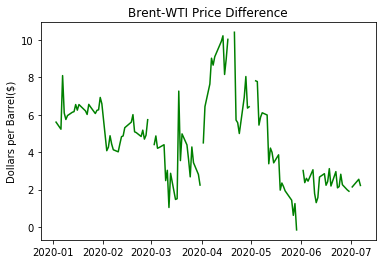

In [14]:
#Graph the diff
plt.plot(CrudeOil.index,CrudeOil['Diff'],'g')
plt.title('Brent-WTI Price Difference')
plt.ylabel('Dollars per Barrel($)');
plt.show()

In [15]:
# Volatility changes indicated by OVX
OVX=pd.read_csv("OVX.csv",parse_dates=["Date"],index_col="Date")
OVX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-07-11 to 2020-07-10
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


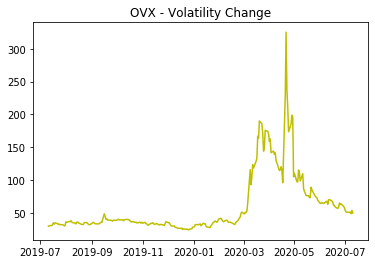

In [16]:
#Plot OVX Change
plt.plot(OVX.index,OVX['Adj Close'],'y')
plt.title('OVX - Volatility Change')
plt.show()

In [17]:
#Production Change with Simple Moving Average
Production=pd.read_csv("Production_of_Crude_Oil.csv",skiprows=4,parse_dates=["Week of"],index_col="Week of")
Production.columns=['Thousand Barrels per Day']
Production.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1954 entries, 2020-07-03 to 1983-01-07
Data columns (total 1 columns):
Thousand Barrels per Day    1954 non-null int64
dtypes: int64(1)
memory usage: 30.5 KB


In [18]:
threeyear_Production=Production[:"2017-07-07"]
threeyear_Production.info()
threeyear_Production.sort_index()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2020-07-03 to 2017-07-07
Data columns (total 1 columns):
Thousand Barrels per Day    157 non-null int64
dtypes: int64(1)
memory usage: 2.5 KB


,Thousand Barrels per Day
Week of,
2017-07-07,9397
2017-07-14,9429
2017-07-21,9410
2017-07-28,9430
2017-08-04,9423
...,...
2020-06-05,11100
2020-06-12,10500
2020-06-19,11000


In [19]:
#calulate moving average
threeyear_Production['pandas_SMA_3'] = threeyear_Production.iloc[:,0].rolling(window=3).mean()
threeyear_Production.head()

/Users/xinranlong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Thousand Barrels per Day,pandas_SMA_3
Week of,,
2020-07-03,11000,NaN
2020-06-26,11000,NaN
2020-06-19,11000,11000.000000
2020-06-12,10500,10833.333333
2020-06-05,11100,10866.666667


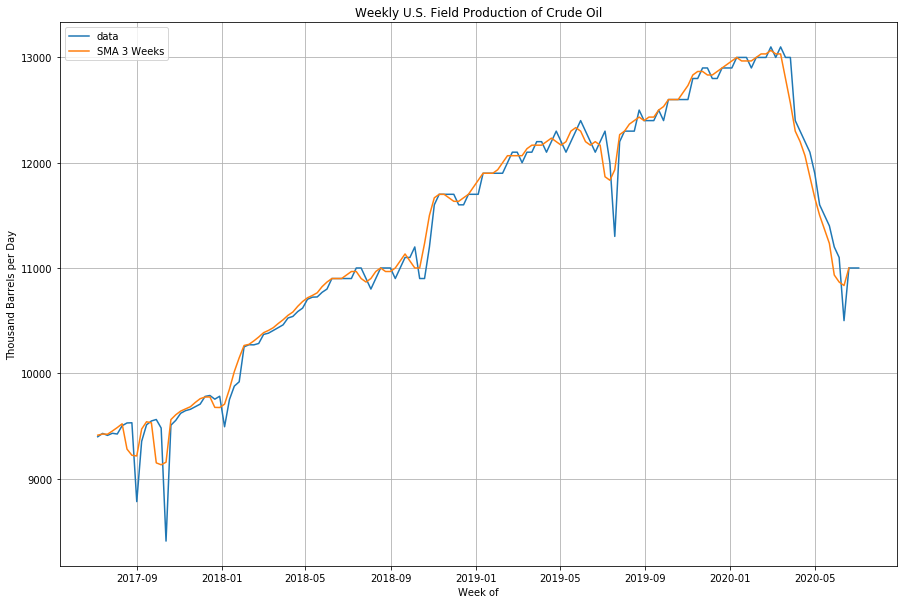

In [20]:
#plot moving average
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(threeyear_Production['Thousand Barrels per Day'],label='data')
plt.plot(threeyear_Production['pandas_SMA_3'],label='SMA 3 Weeks')
plt.xlabel('Week of')
plt.ylabel('Thousand Barrels per Day')
plt.title('Weekly U.S. Field Production of Crude Oil')
plt.legend(loc=2)

In [21]:
#Imports and Export
Imports=pd.read_csv("Imports_of_Crude_Oil.csv",skiprows=4,parse_dates=["Week of"],index_col="Week of")
Imports.columns=['Imports']
Exports=pd.read_csv("Exports_of_Crude_Oil.csv",skiprows=4,parse_dates=["Week of"],index_col="Week of")
Exports.columns=['Exports']

In [22]:
#Merge imports and exports,calculate net import
ImportExport=Imports.merge(Exports,left_index=True,right_index=True)
ImportExport['Net Import'] = ImportExport.Imports - ImportExport.Exports
ImportExport.head()

,Imports,Exports,Net Import
Week of,,,
2020-07-03,7394,2387,5007
2020-06-26,5969,3092,2877
2020-06-19,6540,3157,3383
2020-06-12,6642,2462,4180
2020-06-05,6864,2439,4425


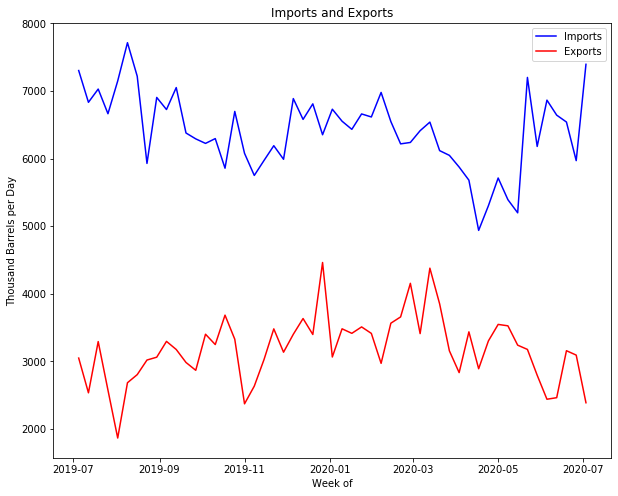

In [23]:
oneyear_ImportExport=ImportExport[:"2019-07-05"]
oneyear_ImportExport.sort_index()
plt.figure(figsize=(10, 8))
plt.plot(oneyear_ImportExport.index,oneyear_ImportExport['Imports'],'b-',label = 'Imports')
plt.plot(oneyear_ImportExport.index,oneyear_ImportExport['Exports'],'r-',label = 'Exports')
plt.xlabel('Week of'); plt.ylabel('Thousand Barrels per Day'); plt.title('Imports and Exports')
plt.legend();

In [24]:
#Demand change indicated by product supplied
Demand=pd.read_csv("Demand_of_Petroleum_Products.csv",skiprows=4,parse_dates=["Week of"],index_col="Week of")
Demand.columns=['Thousand Barrels per Day']

Text(0.5, 1.0, 'Demand by Product Supplied')

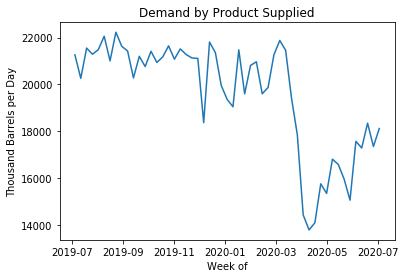

In [25]:
oneyear_Demand=Demand[:"2019-07-05"]
oneyear_Demand.sort_index()
plt.plot(oneyear_Demand)
plt.xlabel('Week of'); plt.ylabel('Thousand Barrels per Day'); plt.title('Demand by Product Supplied')

In [26]:
#Cases data
Cases=pd.read_csv("daily.csv",parse_dates=["date"],index_col="date")
Cases=Cases[['positive','death']]
Cases=Cases.sort_index()
Cases.head()

,positive,death
date,,
2020-01-22,2,NaN
2020-01-23,2,NaN
2020-01-24,2,NaN
2020-01-25,2,NaN
2020-01-26,2,NaN


In [27]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [28]:
#merge cases and price dataset
CasesPrice=Cases.merge(oneyear_WTIprice,left_index=True,right_index=True)
CasesPrice=CasesPrice.sort_index()
CasesPrice.head()
#drop -37
CasesPrice.loc["2020-04-20"]=[np.NaN,np.NaN,np.NaN]
CasesPrice.dropna(how='all',inplace=True)

In [29]:
#linear regression model
X = sm.add_constant(CasesPrice['positive'])
model = sm.OLS(CasesPrice['Price'],X)
results = model.fit()

/Users/xinranlong/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 1.0, 'OLS Linear Regression')

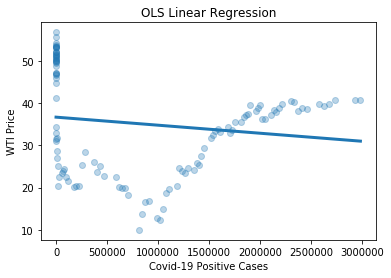

In [30]:
plt.scatter(CasesPrice['positive'],CasesPrice['Price'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*CasesPrice['positive']
plt.plot(CasesPrice['positive'],y_predict, linewidth=3)
plt.xlabel('Covid-19 Positive Cases')
plt.ylabel('WTI Price')
plt.title('OLS Linear Regression')

In [31]:
print(results.summary())
#https://towardsdatascience.com/how-to-model-time-series-data-with-linear-regression-cd94d1d901c0

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.415
Date:                Wed, 22 Jul 2020   Prob (F-statistic):              0.123
Time:                        15:32:37   Log-Likelihood:                -448.93
No. Observations:                 115   AIC:                             901.9
Df Residuals:                     113   BIC:                             907.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6697      1.563     23.459      0.0

In [41]:
#Crude Oil Production by State
#StateProduction=pd.read_csv("Production_State.csv",skiprows=2,parse_dates=["Date"],index_col="Date")
StateProduction=pd.read_csv("Production_State.csv",skiprows=2,parse_dates=["Date"])
StateProduction.columns = StateProduction.columns.str.replace("Field Production of Crude Oil", "")
StateProduction.columns = StateProduction.columns.str.replace("(Thousand Barrels)", "")
StateProduction.columns = StateProduction.columns.str.replace("  ()", "")
StateProduction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 43 columns):
Date                                          244 non-null object
U.S.()                                        244 non-null int64
East Coast (PADD 1)()                         244 non-null int64
Florida()                                     244 non-null int64
New York()                                    244 non-null int64
Pennsylvania()                                244 non-null int64
Virginia()                                    244 non-null int64
West Virginia()                               244 non-null int64
Midwest (PADD 2)()                            244 non-null int64
Illinois()                                    244 non-null int64
Indiana()                                     244 non-null int64
Kansas()                                      244 non-null int64
Kentucky()                                    244 non-null int64
Michigan()                                    244

In [42]:
StateProduction.head()

,Date,U.S.(),East Coast (PADD 1)(),Florida(),New York(),Pennsylvania(),Virginia(),West Virginia(),Midwest (PADD 2)(),Illinois(),...,Utah(),Wyoming(),West Coast (PADD 5)(),Alaska(),Alaska South(),Alaska North Slope Crude Oil Production (),Arizona(),California(),Nevada(),Federal Offshore PADD 5()
0,Jan-00,179316,606,360,16,111,0,118,14341,997,...,1366,5185,57493,31751,935,30816,5,22784,56,2898
1,Feb-00,169703,564,349,19,108,0,88,13905,1027,...,1275,4872,54045,29906,885,29021,3,21332,53,2751
2,Mar-00,183464,662,373,19,145,1,124,15242,1025,...,1348,5201,57334,31395,823,30571,3,22865,55,3016
3,Apr-00,175625,624,385,16,108,1,114,14292,1030,...,1290,5001,55455,30241,893,29348,2,22234,52,2927
4,May-00,181242,692,411,17,130,1,133,14954,1035,...,1317,5197,56137,29934,909,29025,5,23086,52,3059


In [55]:
#latest 2020 April data
AprilProduction=StateProduction.iloc[-1]
AprilProduction

Date                                          20-Apr
U.S.()                                        361831
East Coast (PADD 1)()                           1841
Florida()                                        114
New York()                                        18
Pennsylvania()                                   433
Virginia()                                         0
West Virginia()                                 1275
Midwest (PADD 2)()                             56670
Illinois()                                       462
Indiana()                                         92
Kansas()                                        2266
Kentucky()                                       190
Michigan()                                       274
Missouri()                                        11
Nebraska()                                       102
North Dakota()                                 36424
Ohio()                                          1790
Oklahoma()                                    

In [ ]:
oneyear_StateProduction=StateProduction[231:]
oneyear_StateProduction=oneyear_StateProduction.drop(columns=["U.S.()","East Coast (PADD 1)()","Midwest (PADD 2)()","Gulf Coast (PADD 3)()","Rocky Mountain (PADD 4)()","West Coast (PADD 5)()"])
plt.figure(figsize=(10, 8))
plt.plot(oneyear_StateProduction)
plt.xlabel('Month of'); plt.ylabel('Thousand Barrels'); plt.title('Production by State')
plt.legend();

In [107]:
#Top 3
Top=StateProduction[["Date","Texas()","Federal Offshore--Gulf of Mexico()","North Dakota()"]]
Top=Top[207:]
Top

,Date,Texas(),Federal Offshore--Gulf of Mexico(),North Dakota()
207,17-Apr,99595,49933,31208
208,17-May,105298,52233,31840
209,17-Jun,102763,48940,30693
210,17-Jul,106940,54461,32255
211,17-Aug,103967,53277,33437
212,17-Sep,106077,50801,32883
213,17-Oct,115887,45956,36309
214,17-Nov,115741,50943,35482
215,17-Dec,121005,48649,36085
216,18-Jan,120488,50767,36057


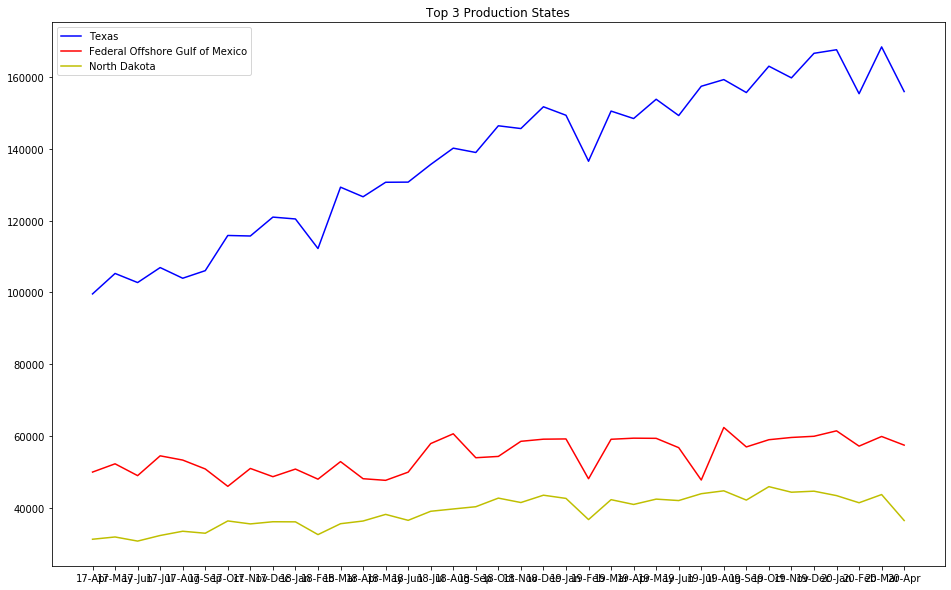

In [110]:
plt.figure(figsize=(16, 10))
plt.plot(Top["Date"],Top["Texas()"],'b-',label = 'Texas')
plt.plot(Top["Date"],Top["Federal Offshore--Gulf of Mexico()"],'r-',label = "Federal Offshore Gulf of Mexico")
plt.plot(Top["Date"],Top["North Dakota()"],'y-',label = 'North Dakota')
plt.title('Top 3 Production States')
plt.legend();